# 식물 질병 예측 프로그램

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 훈련 이미지 전처리 과정

TensorFlow Keras 유틸리티 함수를 사용하여 디렉토리로부터 이미지 데이터셋을 생성
https://keras.io/api/data_loading/image/

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


38개 클래스에 속하는 70295개의 파일을 발견

# 검증 이미지 전처리 과정

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


38개 클래스에 속하는 17572개의 파일을 발견

In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[163.75 147.75 157.75]
   [167.25 151.25 161.25]
   [168.5  152.5  162.5 ]
   ...
   [202.5  194.25 137.5 ]
   [208.   196.   149.75]
   [152.   141.5  102.  ]]

  [[170.5  154.5  164.5 ]
   [169.75 153.75 163.75]
   [167.75 151.75 161.75]
   ...
   [186.5  174.75 121.75]
   [216.75 202.75 161.  ]
   [137.75 126.5   90.5 ]]

  [[170.75 154.75 164.75]
   [170.   154.   164.  ]
   [170.5  154.5  164.5 ]
   ...
   [202.5  187.5  140.5 ]
   [221.   206.   170.75]
   [106.    93.5   64.75]]

  ...

  [[165.5  155.5  166.5 ]
   [159.75 149.75 160.75]
   [158.75 148.75 159.75]
   ...
   [ 49.25  44.25  51.25]
   [ 51.    41.    49.  ]
   [ 59.5   48.5   56.5 ]]

  [[163.   153.   164.  ]
   [162.75 152.75 163.75]
   [172.75 162.75 173.75]
   ...
   [ 46.75  41.75  48.75]
   [ 53.5   43.5   51.5 ]
   [ 51.75  40.75  48.75]]

  [[156.5  146.5  157.5 ]
   [153.25 143.25 154.25]
   [158.5  148.5  159.5 ]
   ...
   [ 43.    38.    45.  ]
   [ 47.75  37.75  45.75]
   [ 52.    41.    4

# 모델 구축

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D

In [8]:
cnn = Sequential() # 모델 초기화

In [9]:
cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\bin00\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 평탄화 작업

오버피팅 방지 예시 코드 : 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [10]:
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=1500,activation='relu'))

cnn.add(Dropout(0.4)) # 오버피팅 방지

# 출력 Layer
cnn.add(Dense(units=38,activation='softmax'))

# 컴파일 모델

In [11]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련

In [13]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1094s 496ms/step - accuracy: 0.4033 - loss: 2.1248 - val_accuracy: 0.8298 - val_loss: 0.5251
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1086s 494ms/step - accuracy: 0.8387 - loss: 0.5154 - val_accuracy: 0.8908 - val_loss: 0.3467
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1086s 494ms/step - accuracy: 0.9027 - loss: 0.3020 - val_accuracy: 0.9253 - val_loss: 0.2257
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1085s 494ms/step - accuracy: 0.9351 - loss: 0.2021 - val_accuracy: 0.9310 - val_loss: 0.2124
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1120s 510ms/step - accuracy: 0.9509 - loss: 0.1488 - val_accuracy: 0.9467 - val_loss: 0.1748
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1089s 496ms/step - accuracy: 0.9634 - loss: 0.1129 - val_accuracy: 0.9483 - val_loss: 0.1705
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1087s 495ms/step - accuracy: 0.9697 - loss: 0.0891 - val_accuracy: 0.9554 - val_loss: 0.1414
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1087s 495ms/s

# 모델 평가

In [14]:
# 훈련 정확도 평가
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 249s 113ms/step - accuracy: 0.9897 - loss: 0.0299
Training accuracy: 0.990795910358429


In [15]:
# 검증 정확도 평가
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 62s 113ms/step - accuracy: 0.9641 - loss: 0.1241
Validation accuracy: 0.9628385901451111


# 모델 저장

In [16]:
cnn.save('Disease_trained_Data.keras')

In [17]:
training_history.history # 반환 기록 내용

{'accuracy': [0.6018351316452026,
  0.8609573841094971,
  0.9133082032203674,
  0.9407354593276978,
  0.9548332095146179,
  0.9651468992233276,
  0.9709367752075195,
  0.9762856364250183,
  0.9792304039001465,
  0.9819901585578918],
 'loss': [1.3515722751617432,
  0.43993857502937317,
  0.2680552005767822,
  0.1840536892414093,
  0.137238010764122,
  0.10627533495426178,
  0.08805305510759354,
  0.07158470153808594,
  0.06469348073005676,
  0.05456972494721413],
 'val_accuracy': [0.8297860026359558,
  0.890792191028595,
  0.9252788424491882,
  0.9310266375541687,
  0.9467334151268005,
  0.9483268857002258,
  0.9553835391998291,
  0.9554973840713501,
  0.9519690275192261,
  0.9628385901451111],
 'val_loss': [0.525077223777771,
  0.34667107462882996,
  0.22571389377117157,
  0.2124183028936386,
  0.1747841238975525,
  0.17050813138484955,
  0.14140066504478455,
  0.1488233357667923,
  0.15669280290603638,
  0.12685862183570862]}

In [18]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [19]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# 모델 정학도 시각화

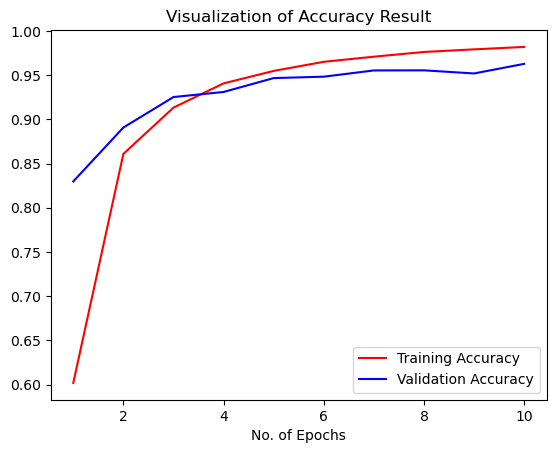

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# 모델 평가를 위한 몇 가지 다른 지표

In [21]:
class_name = validation_set.class_names

In [22]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [23]:
y_pred = cnn.predict(test_set)
y_pred, y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 208s 12ms/step


(array([[9.99993443e-01, 3.67907815e-09, 1.09602865e-11, ...,
         4.68129765e-17, 6.23999273e-16, 1.74423952e-13],
        [9.97384369e-01, 1.85909103e-05, 1.06362495e-05, ...,
         8.46985682e-09, 4.02083131e-08, 6.80434837e-08],
        [1.00000000e+00, 1.39001354e-11, 1.09753623e-10, ...,
         3.08340853e-19, 1.85351646e-15, 1.41651949e-13],
        ...,
        [7.53866438e-14, 3.15012421e-15, 4.25075287e-11, ...,
         6.34735523e-14, 8.58666233e-14, 1.00000000e+00],
        [4.54299792e-13, 6.34013796e-16, 3.11816094e-11, ...,
         6.66614591e-14, 1.43842322e-13, 1.00000000e+00],
        [1.39331675e-17, 2.60899047e-19, 2.20713268e-16, ...,
         1.04517083e-18, 8.55762267e-18, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [24]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [25]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [26]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

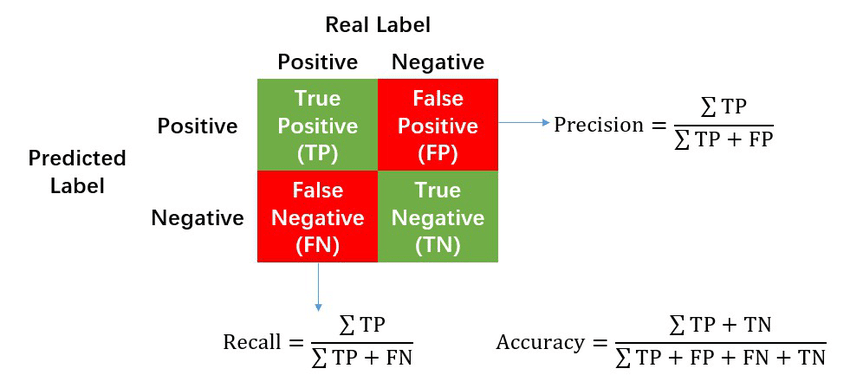



https://blog.naver.com/tommybee/222663277170

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [28]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.92      0.94       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.86      0.99      0.92       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

# 혼동 행렬 시각화

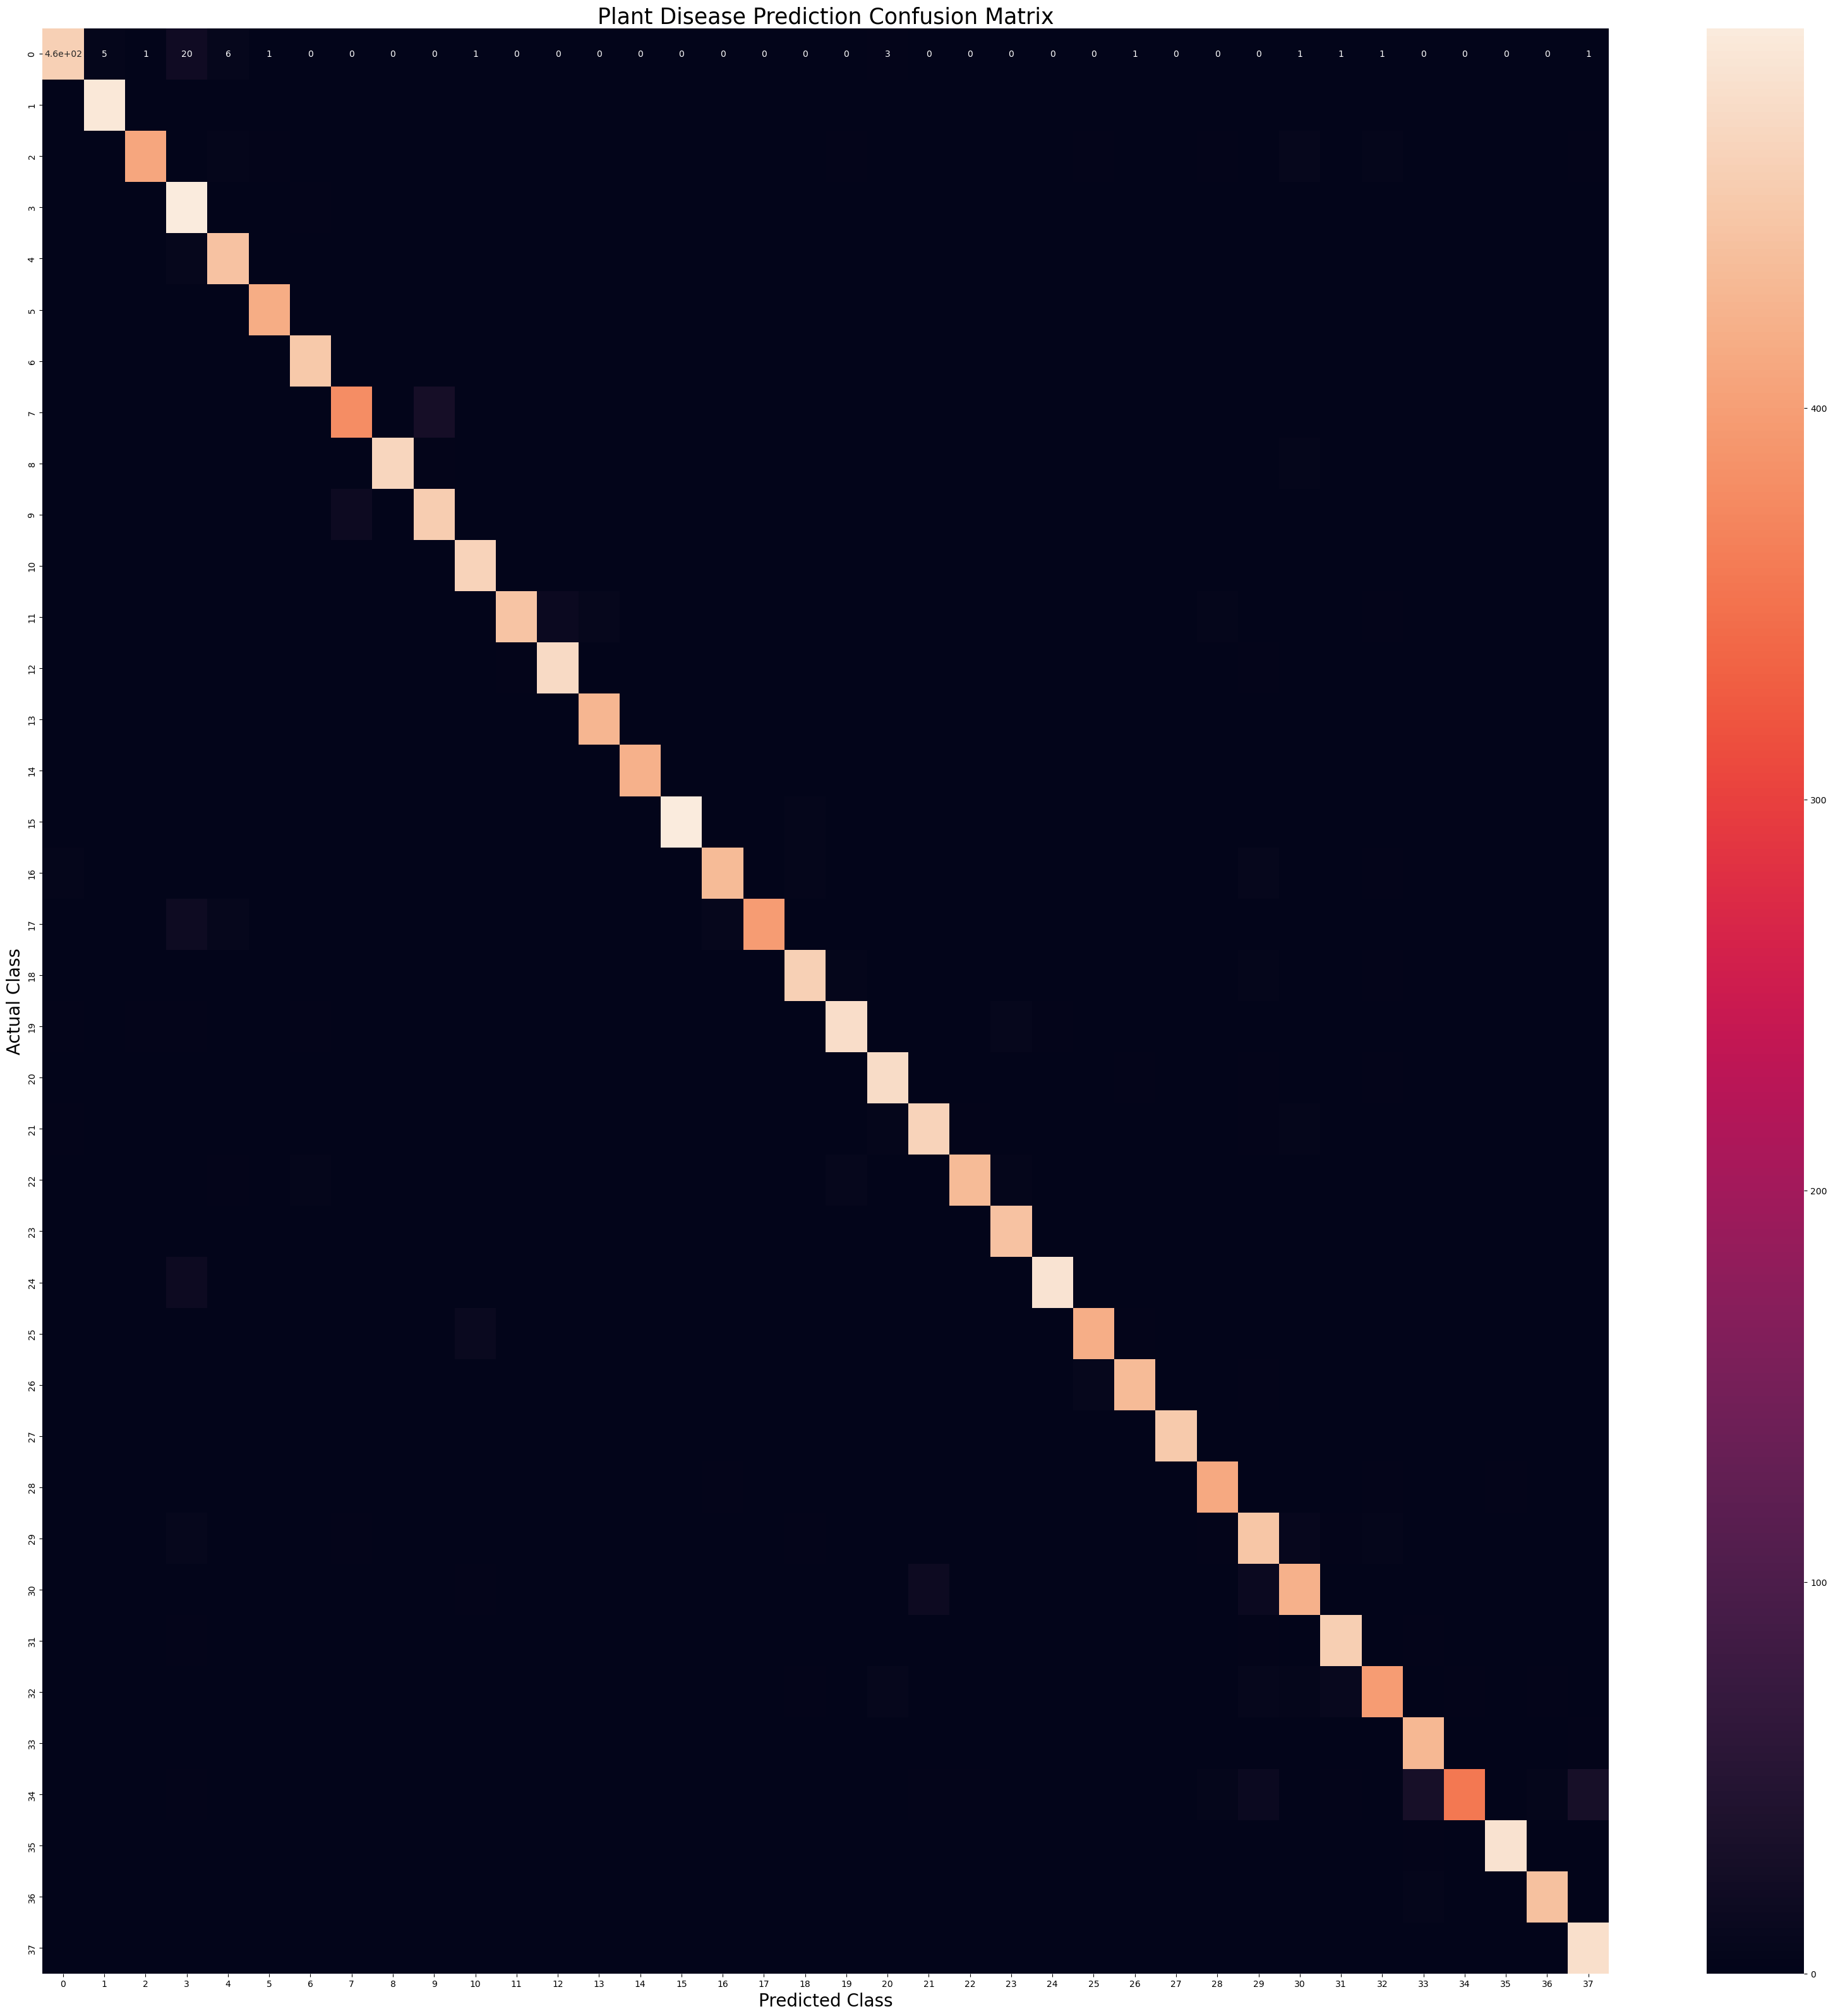

In [29]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()